# Dataset Analysis Objectives

## Delay Variables Analysis
- **Variables**: `ArrDelay`, `DepDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`.
- **Goals**:
  - Assess the distribution for each type of delay.
  - Evaluate the correlation among delay types.
  - Understand their impact on overall arrival and departure delays.

## Flight Timing and Performance Analysis
- **Variables**: `CRSDepTime`, `DepTime`, `CRSArrTime`, `ArrTime`, `ActualElapsedTime`, `CRSElapsedTime`.
- **Goals**:
  - Explore the relationship between scheduled and actual times.
  - Analyze `ActualElapsedTime` versus `CRSElapsedTime`.
  - Detect patterns or outliers that might reveal systematic issues or operational efficiencies.

# Reading Dataset

In [1]:
!pip install seaborn
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

In [9]:
use_cols = [
    # 29 columns out of 109
    "Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime",
    "ArrTime", "CRSArrTime", "Reporting_Airline","Flight_Number_Reporting_Airline", 
    "Tail_Number", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest",
    "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
    "LateAircraftDelay"
]
total_rows = sum(1 for _ in open('On_Time_Reporting_Carrier_On_Time_Performance_2019_7.csv')) - 1
sample_size = 100000
skip_indices = sorted(random.sample(range(1, total_rows + 1), total_rows - sample_size))

reader = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_7.csv',
    usecols=use_cols,
    skiprows=skip_indices,
    chunksize=1000
)
df = pd.concat([chunk for chunk in reader])

# Delay Variables Analysis 

Basic statistics for delay variables:
            ArrDelay      DepDelay  CarrierDelay  WeatherDelay      NASDelay  \
count  97686.000000  98146.000000  20499.000000  20499.000000  20499.000000   
mean       8.776938     14.223371     23.293185      5.365237     17.456266   
std       58.363254     56.756825     73.051953     37.080322     47.313547   
min      -72.000000    -66.000000      0.000000      0.000000      0.000000   
25%      -14.000000     -5.000000      0.000000      0.000000      0.000000   
50%       -6.000000     -2.000000      0.000000      0.000000      0.000000   
75%        9.000000      9.000000     19.000000      0.000000     19.000000   
max     1780.000000   1790.000000   1780.000000   1385.000000   1091.000000   

       SecurityDelay  LateAircraftDelay  
count   20499.000000       20499.000000  
mean        0.082882          30.443729  
std         2.165287          57.837076  
min         0.000000           0.000000  
25%         0.000000           0.000000

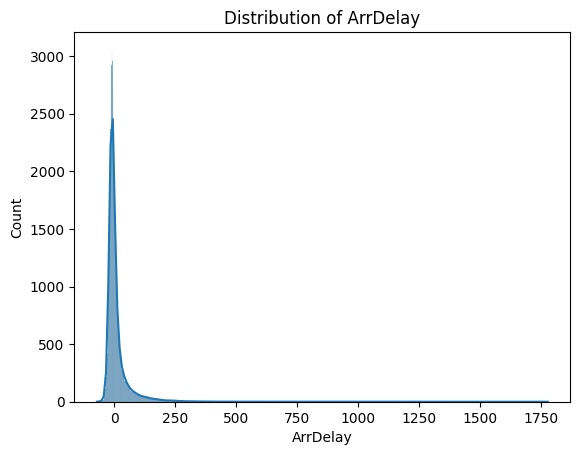

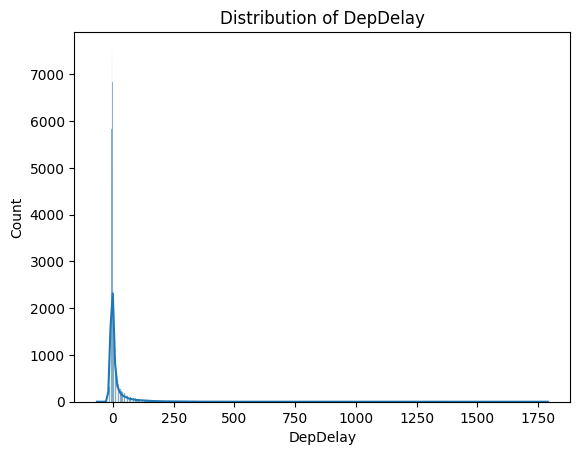

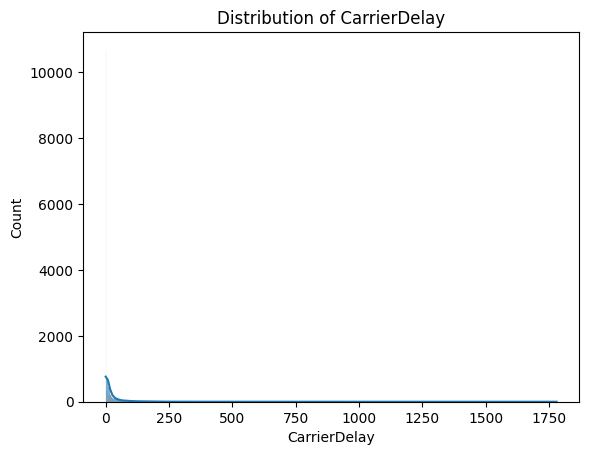

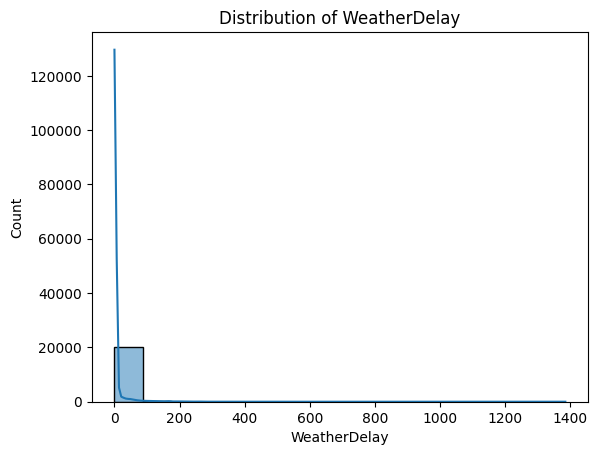

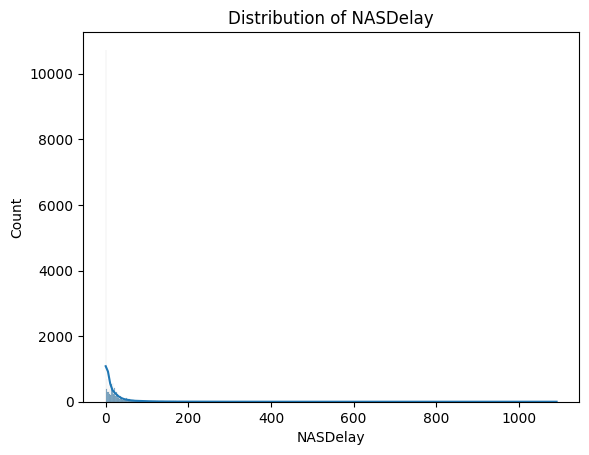

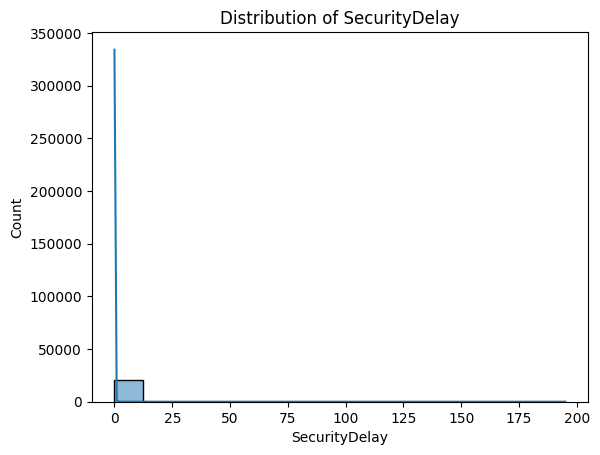

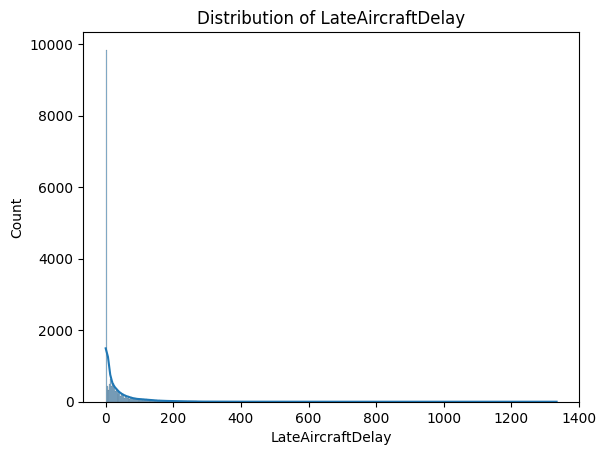

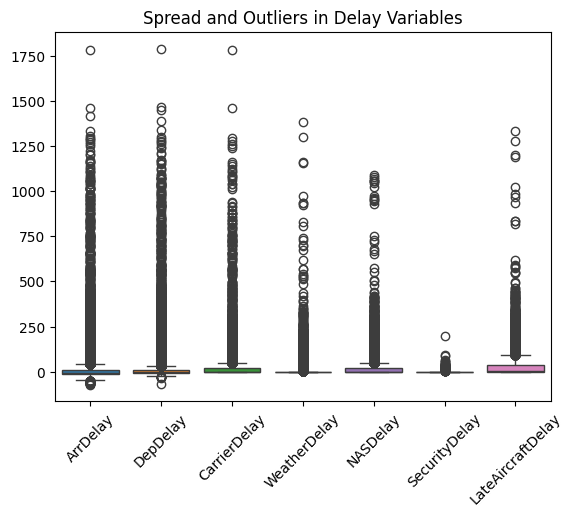

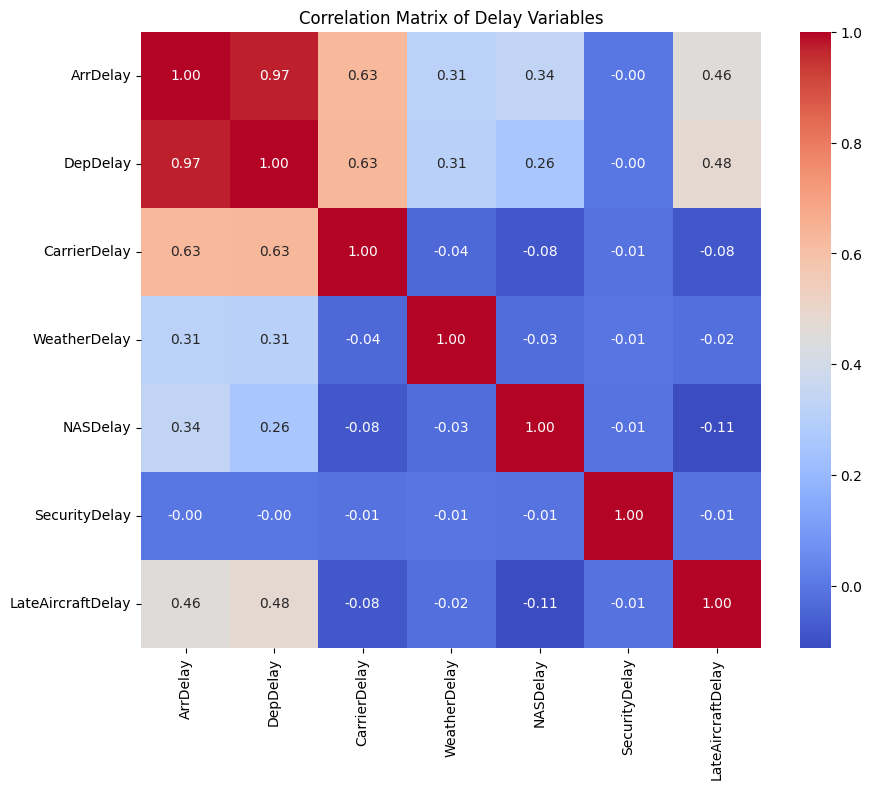

In [10]:
# Basic statistics of delay-related variables
delay_columns = ['ArrDelay', 'DepDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_stats = df[delay_columns].describe()
print("Basic statistics for delay variables:\n", delay_stats)

# For Histograms
for column in delay_columns:
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# For Boxplots
sns.boxplot(data=df[delay_columns])
plt.xticks(rotation=45)
plt.title('Spread and Outliers in Delay Variables')
plt.show()

# Correlation matrix of delay variables
corr_matrix = df[delay_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Delay Variables')
plt.show()

# Analysis of Flight Delay Factors

## High Correlation Between Arrival and Departure Delays
- **Correlation Coefficient**: A strong correlation of 0.97 was observed between `ArrDelay` and `DepDelay`.
- **Operational Implications**: This relationship confirms that departures directly influence arrivals. Timely departures are crucial for on-time arrivals.

## Carrier Delay as a Common Factor
- **Moderate Correlation**: `CarrierDelay` shows a 0.60 correlation with both `ArrDelay` and `DepDelay`, indicating a substantial impact on overall punctuality.
- **Factors**: Delays due to the carrier often stem from maintenance or crew issues, suggesting a potential area for operational improvement.

## Weather and NAS Delays
- **Weather Delays**: `WeatherDelay` has a significant correlation with `ArrDelay` (0.34) and `DepDelay` (0.33), yet it is less predictable than carrier-induced delays.
- **NAS Delays**: `NASDelay` has similar modest correlations with `ArrDelay` and `DepDelay`, reflecting the influence of broader system issues on flight punctuality.

## Security Delays Are Rare
- **Low Impact**: `SecurityDelay` shows almost no correlation with other delay types, with a low average and standard deviation, underscoring their rarity and minimal impact.

## Late Aircraft Delay
- **Cascading Effect**: `LateAircraftDelay` correlates moderately with `ArrDelay` (0.46) and `DepDelay` (0.49), suggesting that delays can propagate through the schedule of an aircraft.

## Skewness and Outliers
- **Distribution**: Delays show right-skewness, with most flights experiencing minimal delays and a few experiencing severe delays.
- **Outliers**: High maximum values for delays like `CarrierDelay` and `LateAircraftDelay` indicate the presence of extreme cases that significantly affect the average.

## Limited Data on Detailed Delay Types
- **Recording Biases**: Detailed delay data is less frequently recorded, possibly only for significant delays, which may skew analyses and understanding of delay causes.

## Conclusions
- **Strategic Focus**: To minimize delays, airlines should focus on carrier-related issues and aircraft turnaround.
- **Outlier Management**: Investigating extreme delay incidents could provide insights into systemic issues and potential solutions.

# Flight Timing and Performance Analysis

Basic statistics for timing and performance variables:
          CRSDepTime       DepTime     CRSArrTime       ArrTime  \
count  100000.00000  98146.000000  100000.000000  98020.000000   
mean     1334.27870   1333.974701    1474.327530   1437.217986   
std       500.94311    521.044397     532.612218    562.803676   
min         5.00000      1.000000       1.000000      1.000000   
25%       910.00000    907.000000    1050.000000   1026.000000   
50%      1325.00000   1323.000000    1507.000000   1446.000000   
75%      1745.00000   1753.000000    1921.250000   1914.000000   
max      2359.00000   2400.000000    2359.000000   2400.000000   

       ActualElapsedTime  CRSElapsedTime  
count       97686.000000   100000.000000  
mean          136.820517      142.002740  
std            73.029186       72.923932  
min            17.000000       20.000000  
25%            84.000000       90.000000  
50%           119.000000      124.000000  
75%           167.000000      171.000000  
max  

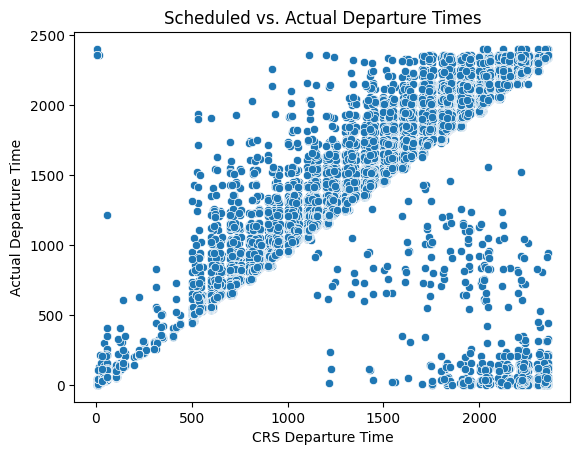

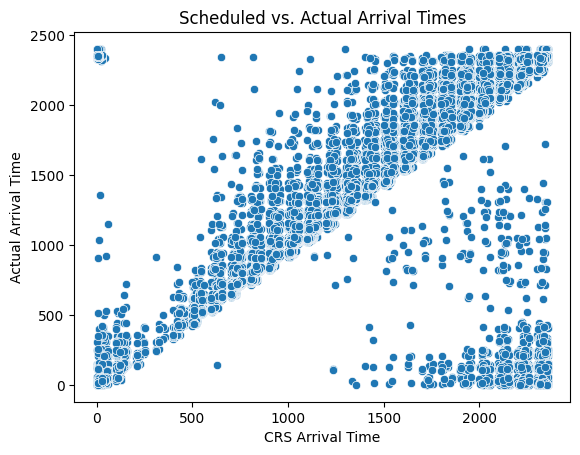

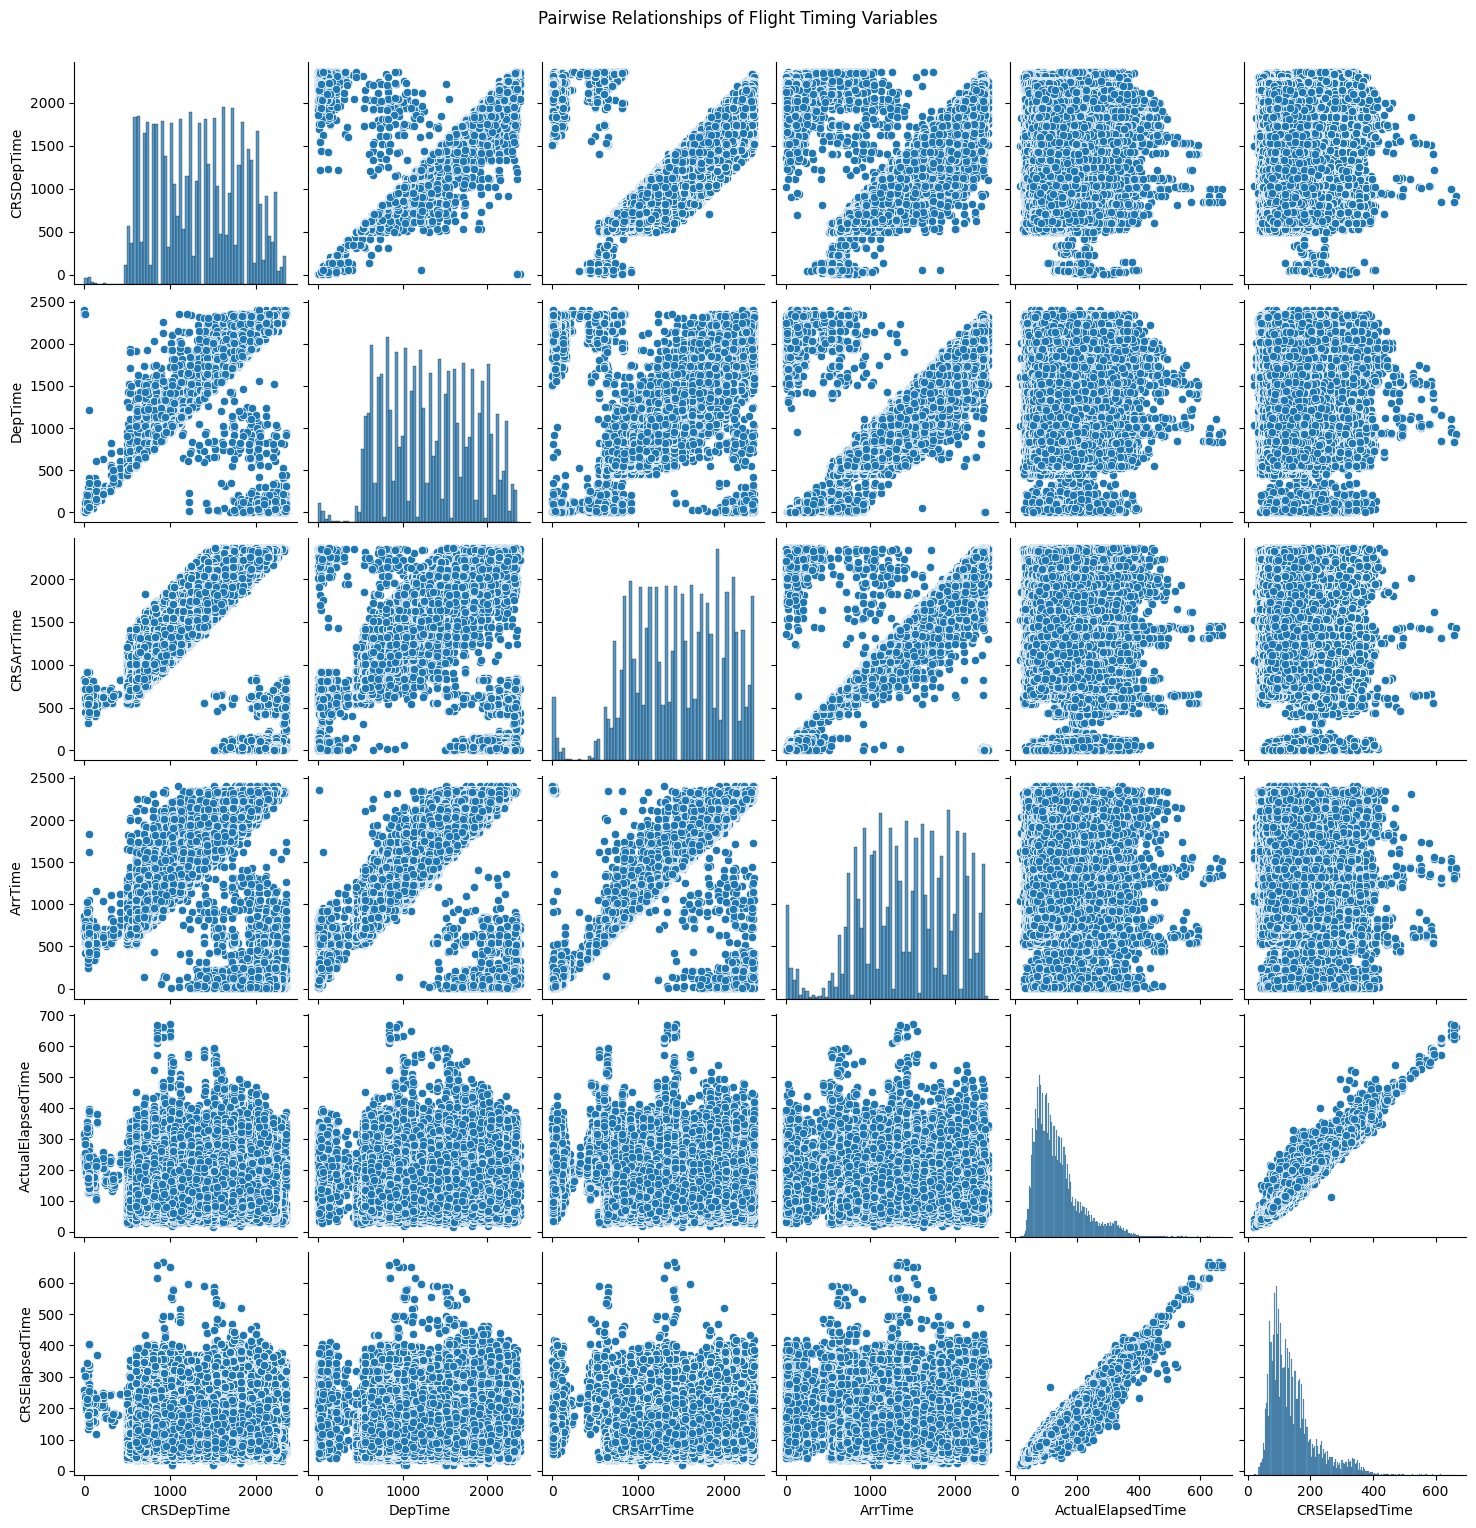

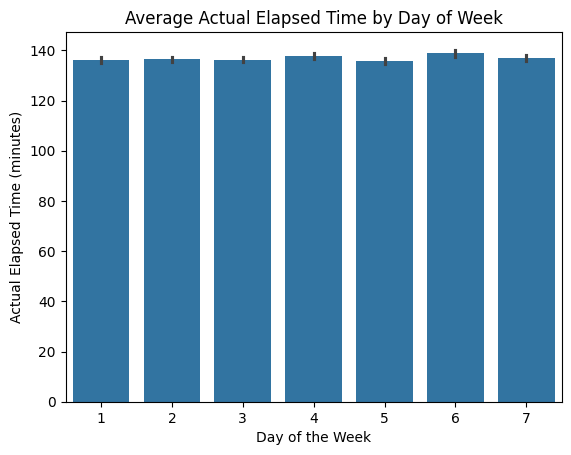

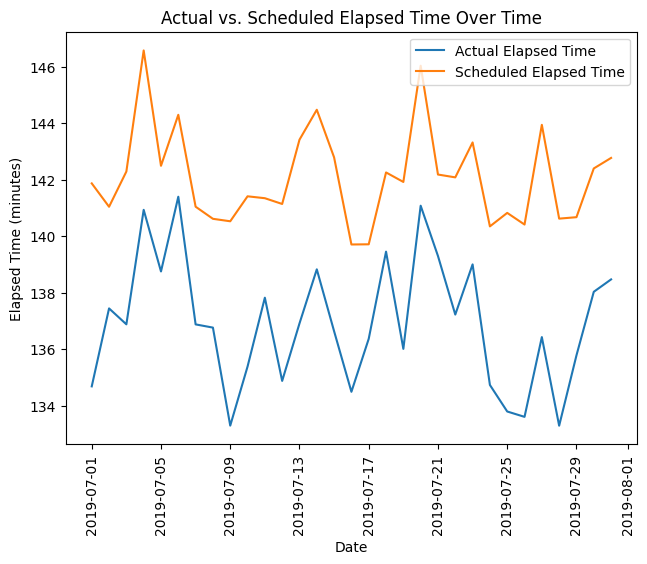

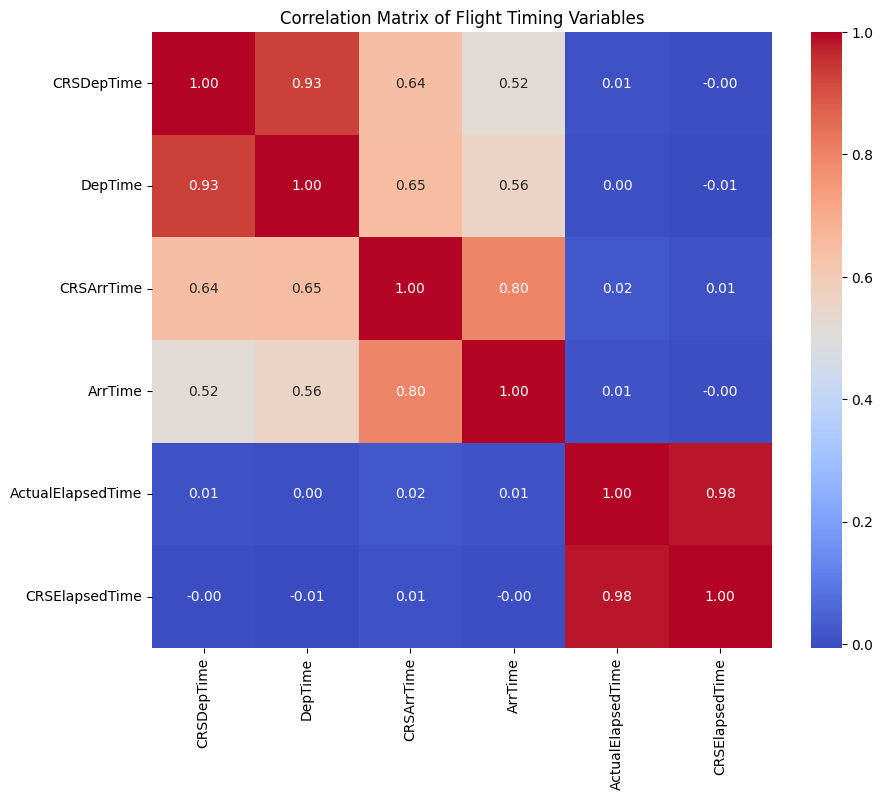

In [11]:
# Basic statistics of timing-related variables
timing_columns = ['CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime']
timing_stats = df[timing_columns].describe()
print("Basic statistics for timing and performance variables:\n", timing_stats)
sns.scatterplot(data=df, x='CRSDepTime', y='DepTime')
plt.title('Scheduled vs. Actual Departure Times')
plt.xlabel('CRS Departure Time')
plt.ylabel('Actual Departure Time')
plt.show()

# Scatter plot between scheduled arrival and actual arrival times
sns.scatterplot(data=df, x='CRSArrTime', y='ArrTime')
plt.title('Scheduled vs. Actual Arrival Times')
plt.xlabel('CRS Arrival Time')
plt.ylabel('Actual Arrival Time')
plt.show()

# Pair plot for all flight timing variables
sns.pairplot(data=df[['CRSDepTime', 'DepTime', 'CRSArrTime', 'ArrTime', 'ActualElapsedTime', 'CRSElapsedTime']])
plt.suptitle('Pairwise Relationships of Flight Timing Variables', y=1.02)
plt.show()

# Bar chart for the average actual elapsed time by day of the week
sns.barplot(x='DayOfWeek', y='ActualElapsedTime', data=df)
plt.title('Average Actual Elapsed Time by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Actual Elapsed Time (minutes)')
plt.show()

# Line plot for the average actual and scheduled elapsed time over time
df['Date'] = pd.to_datetime({
    'year': df['Year'],
    'month': df['Month'],
    'day': df['DayofMonth']
})
df_grouped = df.groupby('Date').agg({
    'ActualElapsedTime': 'mean', 
    'CRSElapsedTime': 'mean'
}).reset_index()

plt.xticks(rotation=90) 
plt.tight_layout()  
sns.lineplot(data=df_grouped, x='Date', y='ActualElapsedTime', label='Actual Elapsed Time')
sns.lineplot(data=df_grouped, x='Date', y='CRSElapsedTime', label='Scheduled Elapsed Time')
plt.title('Actual vs. Scheduled Elapsed Time Over Time')
plt.xlabel('Date')
plt.ylabel('Elapsed Time (minutes)')
plt.legend()
plt.show()

# Correlation matrix for timing variables
timing_corr_matrix = df[timing_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(timing_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Flight Timing Variables')
plt.show()

# Flight Timing and Performance Analysis

## Strong Adherence to Schedule
- **Scheduled vs. Actual Times**: There's a high correlation between `CRSDepTime` and `DepTime` (0.93), as well as `CRSArrTime` and `ArrTime` (0.80), underscoring a strong adherence to the flight schedule.
- **Basic Statistics**: The average and median values for both scheduled and actual times are close, with standard deviations indicating some variability but overall consistency.

## Correlation Between Departure and Arrival
- **Interdependency**: Scheduled departure (`CRSDepTime`) and arrival times (`CRSArrTime`) show a moderate correlation of 0.64, hinting at the influence of other variables on flight arrival times beyond just the departure schedule.

## In-flight Time Variability
- **Minimal Correlation**: Departure and arrival times show a very low correlation with `ActualElapsedTime`, suggesting in-flight durations are influenced by factors like air traffic control and weather, which are not always related to the scheduling.

## Predictability in Flight Duration
- **Duration Estimates**: The correlation between `ActualElapsedTime` and `CRSElapsedTime` is very high at 0.98, indicating airlines can predict how long a flight will take with great accuracy.
- **Basic Statistics**: The mean `ActualElapsedTime` is slightly lower than the `CRSElapsedTime`, with standard deviations indicating some variability, mostly consistent with scheduled flight durations.

## Outliers and Flight Duration
- **Variability**: Despite the high correlation in flight durations, the maximum `ActualElapsedTime` is significantly longer than the maximum `CRSElapsedTime`, pointing to occasional flights that are much longer than scheduled.
- **Skewness Indication**: The presence of outliers in `ActualElapsedTime` may suggest skewness, where most flights are around the average duration, but a few are exceptionally long.

## Conclusion on Flight Timing
- **Scheduling Precision**: The data demonstrates a high level of precision in scheduling flights. Variability in actual flight times suggests a potential area for operational improvement, particularly in managing factors that cause significant deviations.